# DESC: Plot select crime in Los Angeles, 2010 - 2018, by LAPD Area (or division) and normalize select crime count by area (in square miles)

## CAUTION: Script is work in progess. No warranties of any kind are provided


In [19]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
import plotly 

In [9]:
file_out_data='Resources/Crime_month_dataarea.csv'
csv_in = 'Resources/Crime_Data_from_2010_to_Present.csv'
div_area = 'Resources/LAPD_divisions_area.csv'

## Data Wrangling

In [10]:
# Read in first 100,000 rows if preferred for testing
df = pd.read_csv(csv_in, encoding='utf8', parse_dates=['Date Occurred'])#,nrows=1000)
# Define date field
dt_field = 'Date Occurred'

# Convert column to date time
df[dt_field] = pd.to_datetime(df[dt_field])

df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,809,01/17/2015,2015-01-16,2130,9,Van Nuys,938,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,6200 FULTON AV,NaN,"(34.1814, -118.4263)"
1,141801696,01/01/2015,2015-01-01,230,18,Southeast,1823,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0444 0429 0416 1276,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626.0,NaN,NaN,NaN,200 E 97TH ST,NaN,"(33.9483, -118.2717)"
2,141816266,11/05/2015,2015-10-01,800,12,77th Street,1249,805,PIMPING,1402 0908 0913,...,NaN,AA,Adult Arrest,805.0,998.0,NaN,NaN,FIGUEROA ST,65TH ST,"(33.9807, -118.2827)"
3,150100503,01/01/2015,2015-01-01,40,1,Central,111,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,NaN,IC,Invest Cont,745.0,998.0,NaN,NaN,HILL ST,CESAR E CHAVEZ,"(34.0591, -118.2412)"
4,150100506,01/01/2015,2015-01-01,240,1,Central,162,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 1243 0416 1251 0400 0444,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,500 W 7TH ST,NaN,"(34.0467, -118.2556)"


In [11]:

# Define query ensuring date format below and
# Select where crime code description contains defined words
query = (df[dt_field] >= '01-01-2010') & (df[dt_field] <= '12-31-2018')&\
    (df['Crime Code Description'].str.contains('AGGRAVATED|MURDER|RAPE|BURGLARY|LARCENY|VEHICLE THEFT|ARSON|273.5|BTFV/TFMV|GRAND THEFT AUTO'))
# Convert to expected value
query=df.loc[query]


query.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
5,150100507,01/01/2015,2015-01-01,1100,1,Central,156,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,2000 1814 1218 2002 1206 0416 0373 2005,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,236.0,NaN,NaN,NaN,6TH,MAIN,"(34.0437, -118.2455)"
10,150100520,01/05/2015,2015-01-05,2145,1,Central,153,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,0416 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,236.0,NaN,NaN,NaN,200 W 6TH ST,NaN,"(34.046, -118.2509)"
20,150100542,01/15/2015,2015-01-14,130,1,Central,142,121,"RAPE, FORCIBLE",2002 0500,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,121.0,NaN,NaN,NaN,400 S FIGUEROA ST,NaN,"(34.0535, -118.256)"
23,150100549,01/15/2015,2015-01-13,900,1,Central,153,121,"RAPE, FORCIBLE",1415 0411 0421 0519 0522 0449 0356 0500 0527,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,121.0,998.0,NaN,NaN,500 S SPRING ST,NaN,"(34.0467, -118.252)"
24,150100550,01/16/2015,2015-01-15,1600,1,Central,192,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0400 0416,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,230.0,NaN,NaN,NaN,1300 S FLOWER ST,NaN,"(34.0401, -118.2668)"


In [12]:

query.to_csv(file_out_data, mode='w',index=False)
df= pd.read_csv(file_out_data)
df = df['Area Name'].value_counts()
df.head()
df.header2= ['AreaName','Count']
# to csv using specified header values
# Drop Area Name, 1 specifies column

df.to_csv('Resources/output.csv',header=True, index_label=df.header2)
dfnew= pd.read_csv('Resources/output.csv')

dfnew.drop(dfnew.columns[[2]], axis=1)
df_count = dfnew.to_csv('Resources/count.csv')
df_count = pd.read_csv('Resources/count.csv')

In [13]:
div_area = pd.read_csv(div_area)
div_area.head()

,APREC,AREA_MI
0,MISSION,36.68
1,DEVONSHIRE,70.59
2,FOOTHILL,67.98
3,TOPANGA,47.56
4,WEST VALLEY,48.97


## Data Wrangling (continued...)
### Merge crime and division data to get area

In [14]:
# Merge crime and district data
area_val=div_area['APREC'].astype('str')
area_count=df_count['AreaName'].astype('str').str.upper()
dist_output =pd.merge(df_count, div_area, how="left", left_on=area_count, right_on=area_val)
#div_data.drop(columns=['Call_Type_Text'])   
# drop columns
dr_ls = ['key_0','Area Name', 'Unnamed: 0']
new_df = dist_output[dr_ls]
dist_output = dist_output.drop(columns=new_df)
dist_output.head()

,AreaName,Count,APREC,AREA_MI
0,77th Street,30268,77TH STREET,16.45
1,Southwest,24641,SOUTHWEST,17.89
2,N Hollywood,22985,N HOLLYWOOD,33.18
3,Southeast,22415,SOUTHEAST,13.58
4,Pacific,22156,PACIFIC,37.35


In [15]:
dist_output['count_sqmi']=round(dist_output['Count']/dist_output['AREA_MI'])
dist_output.head(22)
dist_output.to_csv('Resources/bar_output.csv')

## Create Plot

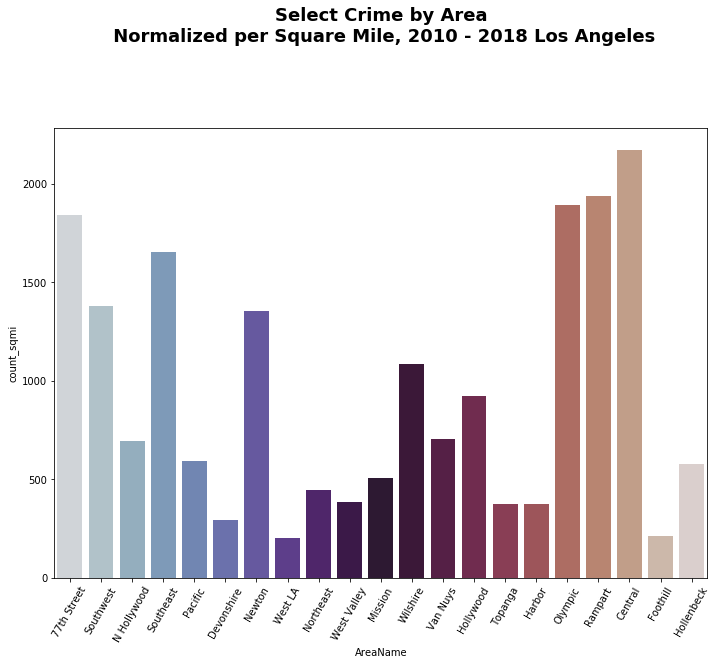

In [16]:

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=60)
g = sns.barplot(x="AreaName", y="count_sqmi", data=dist_output,palette="twilight")
plt.title('Select Crime by Area\n Normalized per Square Mile, 2010 - 2018 Los Angeles',y=1.18,fontsize=18,weight=800)

fname='Resources/crime_area.png'
# output file
plt.savefig(fname,bbox_inches="tight",dpi=300)

# Set as Plotly Plot
## Must provide username and password

In [20]:
# Obtain your api_key here: https://plot.ly/settings/api
# Cufflinks binds plotly to pandas dataframes in IPython notebook.
import plotly.plotly as py
import cufflinks as cf
import plotly.tools as tls
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username=username, api_key=api_key)
df = pd.read_csv('Resources/bar_output.csv')
df = pd.DataFrame(df)
df.head()


,Unnamed: 0,AreaName,Count,APREC,AREA_MI,count_sqmi
0,0,77th Street,30268,77TH STREET,16.45,1840.0
1,1,Southwest,24641,SOUTHWEST,17.89,1377.0
2,2,N Hollywood,22985,N HOLLYWOOD,33.18,693.0
3,3,Southeast,22415,SOUTHEAST,13.58,1651.0
4,4,Pacific,22156,PACIFIC,37.35,593.0


In [21]:
data = [
    go.Bar(
        x=df['AreaName'], # assign x as the dataframe column 'x'
        y=df['count_sqmi']
    )
]
#url = py.plot(data, filename='pandas-bar-chart')
py.iplot(data, filename='mpl-linestyles-column')
layout = go.Layout(
        title='Select Crime by Area<br> Normalized per Square Mile, 2010 - 2018 Los Angeles',
        xaxis=dict(
            title='Area Name',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Count (per square mile)',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig)

'file://C:\\Users\\N5875\\GIS\\talks\\pondering-police-data-master\\01-la-seriouscrime-totals\\temp-plot.html'